# Node Classification Using Graphical Neural Network

## Sunny Shaban Ali [22K-4149]

### CORA Dataset

Accuracy: 0.7920
Precision: 0.8071
Recall: 0.7920
F1 Score: 0.7927


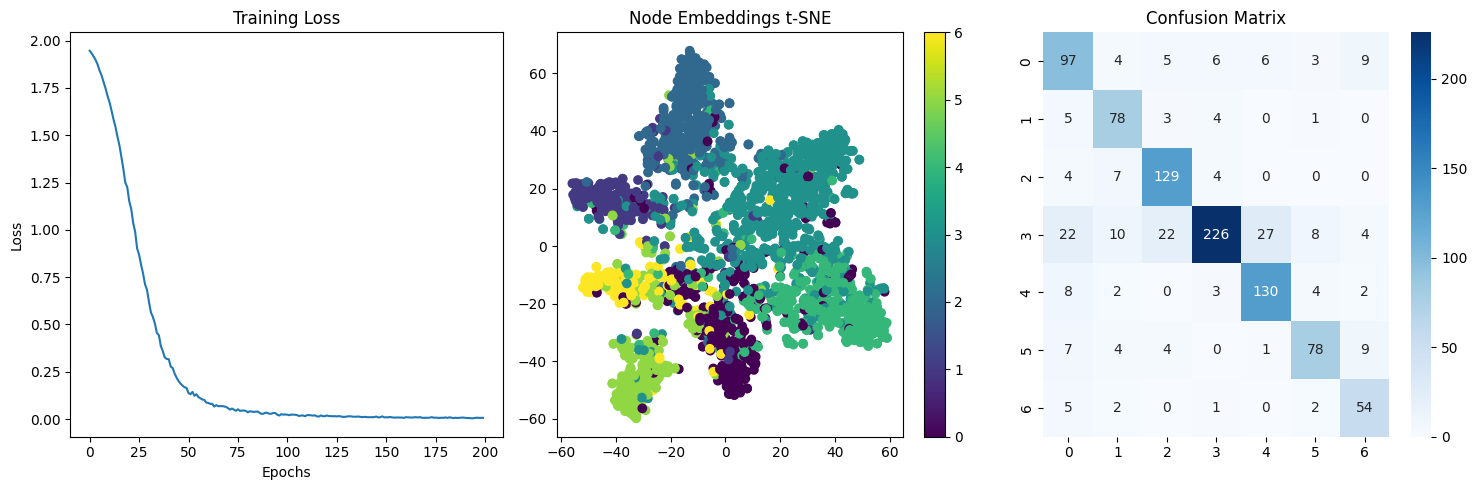

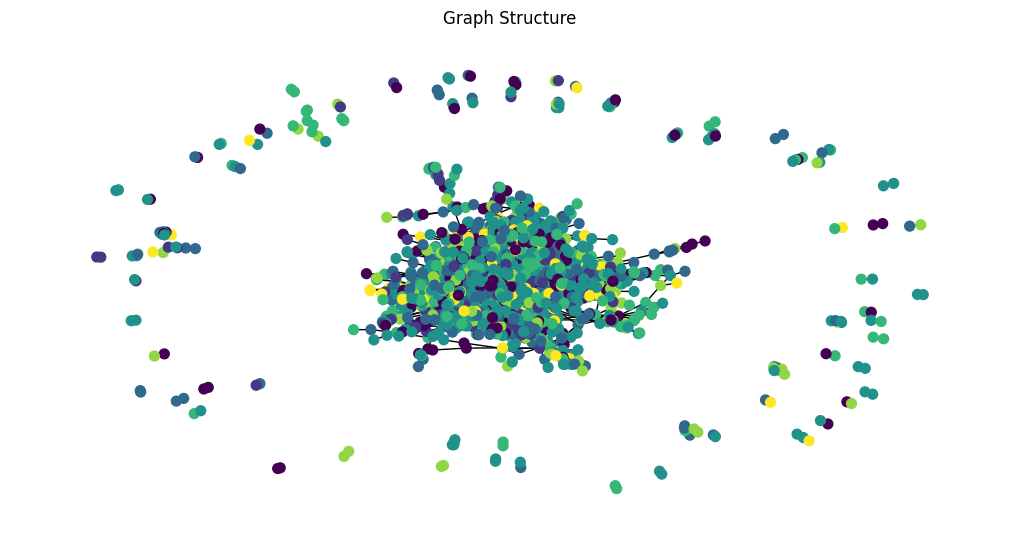

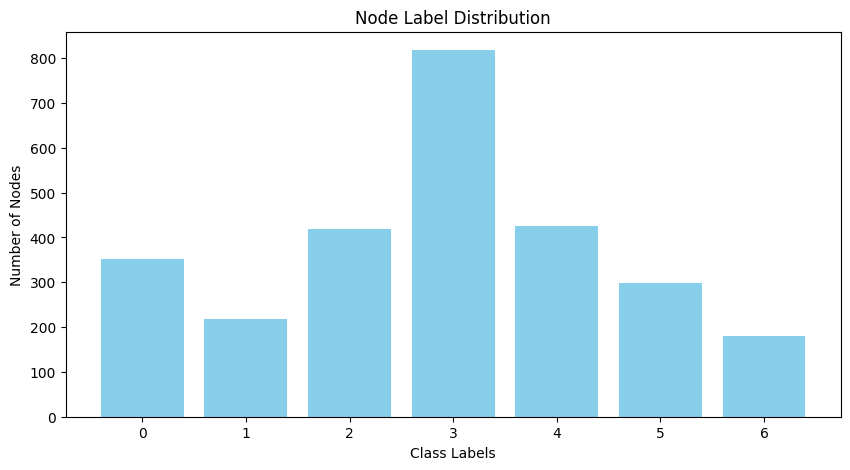

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.nn import GCNConv
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    classification_report
)
from sklearn.manifold import TSNE

class GraphNeuralNetwork(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GraphNeuralNetwork, self).__init__()
        self.conv1 = GCNConv(num_features, 64)
        self.conv2 = GCNConv(64, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

def train_model(model, data):
    """Train the graph neural network with training progress tracking"""
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # Lists to track training progress
    train_losses = []

    for epoch in range(200):
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])

        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

    return train_losses

def evaluate_model(model, data):
    """Evaluate model performance with detailed metrics"""
    model.eval()
    with torch.no_grad():
        pred = model(data.x, data.edge_index).argmax(dim=1)

    # Compute metrics
    test_mask = data.test_mask
    y_true = data.y[test_mask].numpy()
    y_pred = pred[test_mask].numpy()

    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='weighted'
    )

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

def visualize_results(model, data, train_losses):
    """Generate multiple visualizations"""
    plt.figure(figsize=(15, 5))

    # 1. Training Loss Plot
    plt.subplot(131)
    plt.plot(train_losses)
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    # 2. Node Embeddings Visualization
    plt.subplot(132)
    model.eval()
    with torch.no_grad():
        embeddings = model.conv1(data.x, data.edge_index)

    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings.numpy())

    scatter = plt.scatter(
        embeddings_2d[:, 0],
        embeddings_2d[:, 1],
        c=data.y.numpy(),
        cmap='viridis'
    )
    plt.colorbar(scatter)
    plt.title('Node Embeddings t-SNE')

    # 3. Confusion Matrix
    plt.subplot(133)
    with torch.no_grad():
        pred = model(data.x, data.edge_index).argmax(dim=1)

    test_mask = data.test_mask
    y_true = data.y[test_mask].numpy()
    y_pred = pred[test_mask].numpy()

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

def visualize_graph_structure(data):
    """Visualize the graph structure"""
    plt.figure(figsize=(10, 5))

    # Create a NetworkX graph from the edge index
    G = nx.from_edgelist(data.edge_index.t().numpy())

    # Set node colors based on the class labels
    node_colors = data.y.numpy()

    # Draw the graph with spring layout
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, cmap=plt.cm.viridis)
    plt.title('Graph Structure')
    plt.show()

def visualize_label_distribution(data):
    """Visualize the distribution of node labels"""
    plt.figure(figsize=(10, 5))

    labels = data.y.numpy()
    unique_labels, counts = np.unique(labels, return_counts=True)

    plt.bar(unique_labels, counts, color='skyblue')
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Nodes')
    plt.title('Node Label Distribution')
    plt.xticks(unique_labels)
    plt.show()

def main():
    # Load dataset
    dataset = Planetoid(root='data/Planetoid', name='Cora',
                        transform=NormalizeFeatures())
    data = dataset[0]

    # Initialize model
    model = GraphNeuralNetwork(
        num_features=dataset.num_features,
        num_classes=dataset.num_classes
    )

    # Train model and track losses
    train_losses = train_model(model, data)

    # Evaluate performance
    results = evaluate_model(model, data)

    # Print results
    for metric, value in results.items():
        print(f"{metric}: {value:.4f}")

    # Visualize results
    visualize_results(model, data, train_losses)

    # Additional visualizations
    visualize_graph_structure(data)
    visualize_label_distribution(data)

if __name__ == "__main__":
    main()


## PubMed Dataset

Accuracy: 0.7590
Precision: 0.7662
Recall: 0.7590
F1 Score: 0.7586


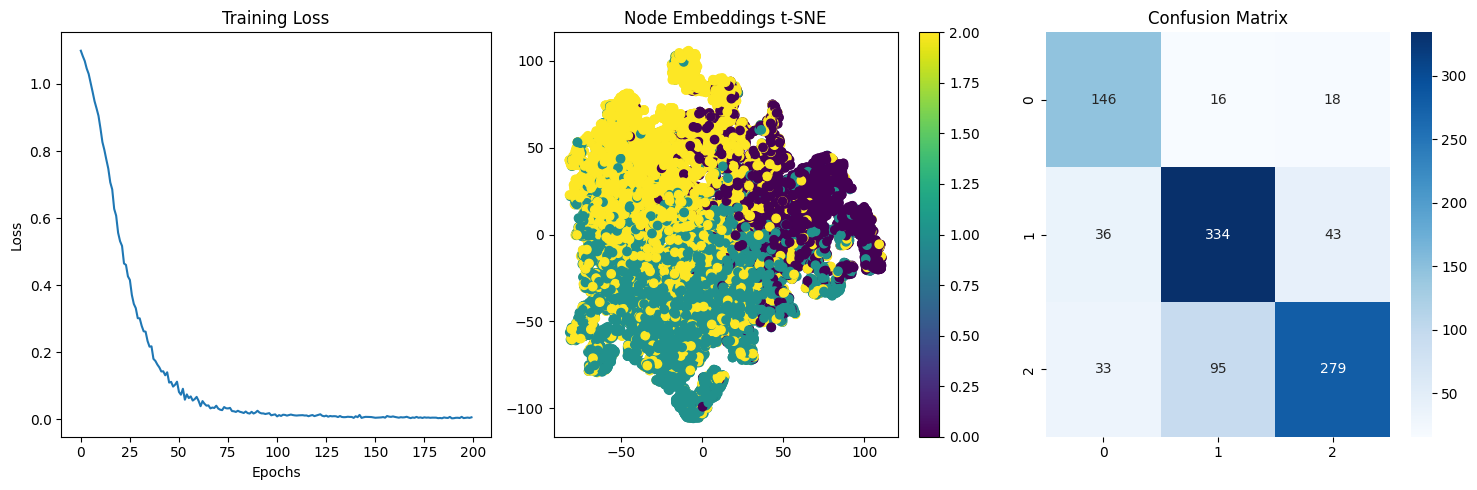

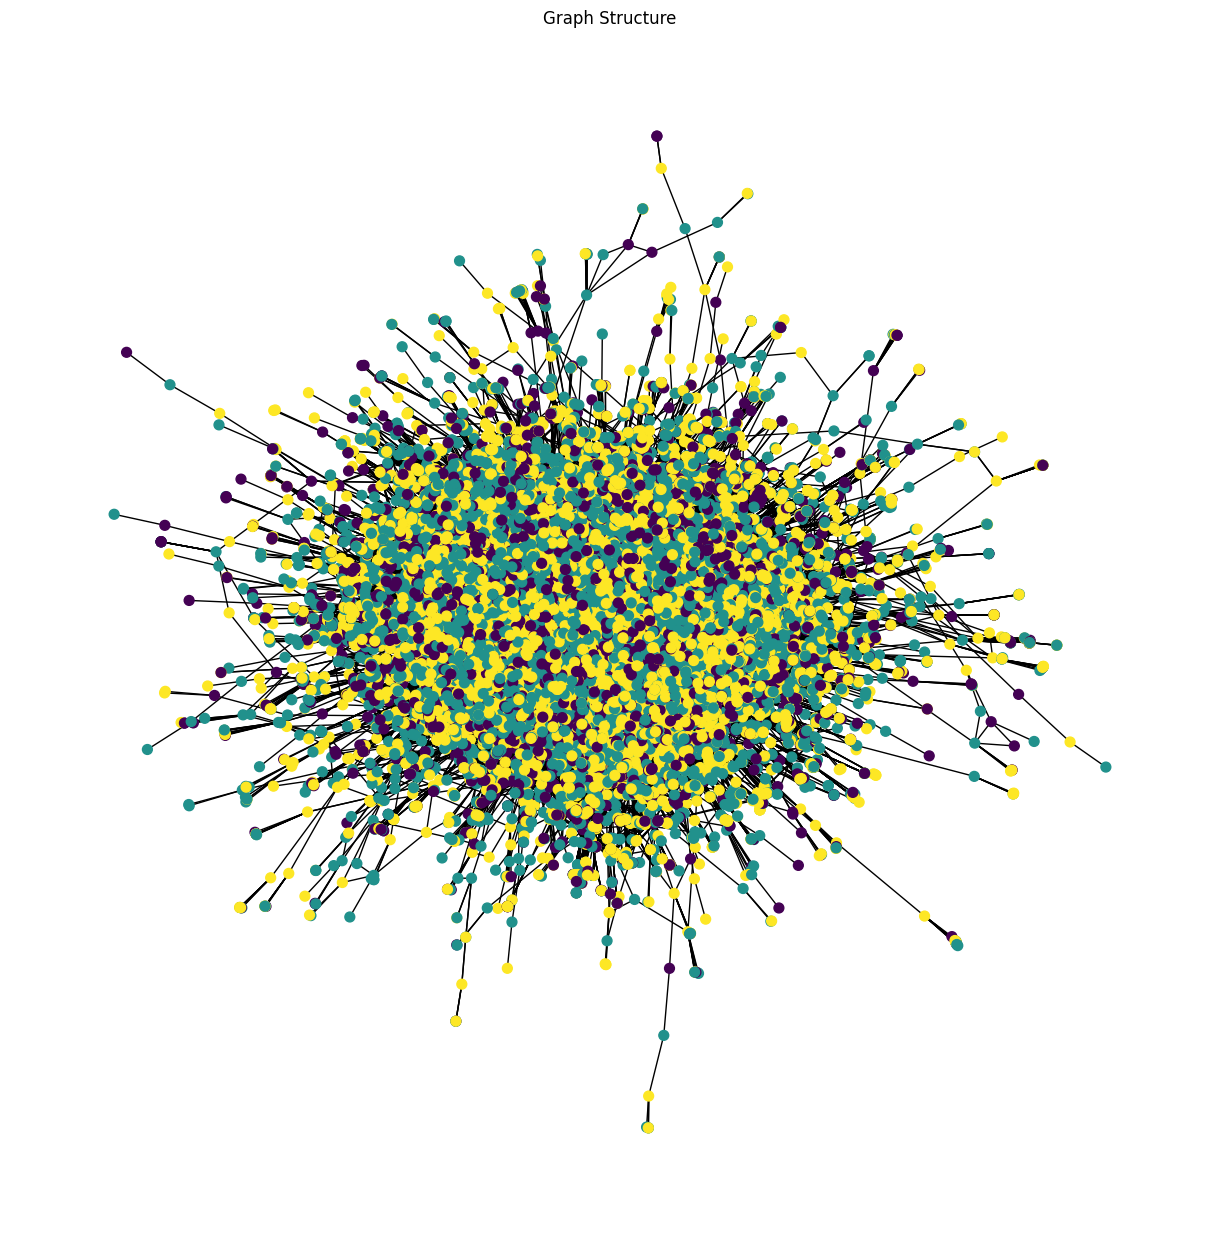

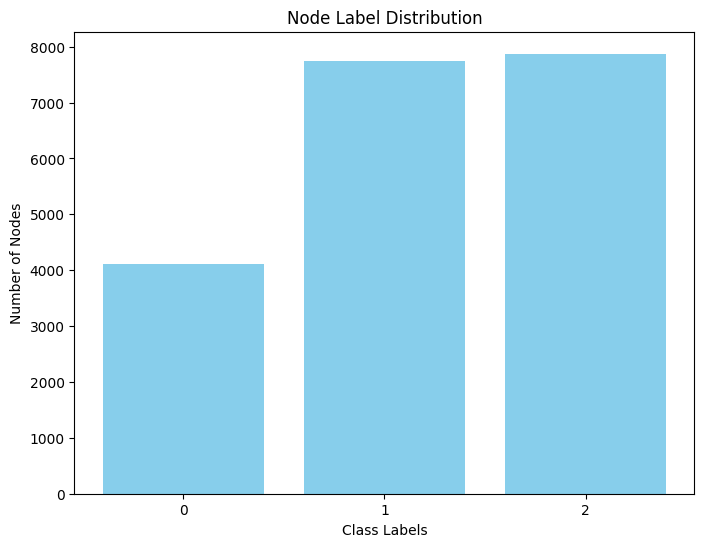

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.nn import GCNConv
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    classification_report
)
from sklearn.manifold import TSNE

class GraphNeuralNetwork(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GraphNeuralNetwork, self).__init__()
        self.conv1 = GCNConv(num_features, 64)
        self.conv2 = GCNConv(64, num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

def train_model(model, data):
    """Train the graph neural network with training progress tracking"""
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # Lists to track training progress
    train_losses = []

    for epoch in range(200):
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])

        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

    return train_losses

def evaluate_model(model, data):
    """Evaluate model performance with detailed metrics"""
    model.eval()
    with torch.no_grad():
        pred = model(data.x, data.edge_index).argmax(dim=1)

    # Compute metrics
    test_mask = data.test_mask
    y_true = data.y[test_mask].numpy()
    y_pred = pred[test_mask].numpy()

    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='weighted'
    )

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

def visualize_results(model, data, train_losses):
    """Generate multiple visualizations"""
    plt.figure(figsize=(15, 5))

    # 1. Training Loss Plot
    plt.subplot(131)
    plt.plot(train_losses)
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    # 2. Node Embeddings Visualization
    plt.subplot(132)
    model.eval()
    with torch.no_grad():
        embeddings = model.conv1(data.x, data.edge_index)

    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings.numpy())

    scatter = plt.scatter(
        embeddings_2d[:, 0],
        embeddings_2d[:, 1],
        c=data.y.numpy(),
        cmap='viridis'
    )
    plt.colorbar(scatter)
    plt.title('Node Embeddings t-SNE')

    # 3. Confusion Matrix
    plt.subplot(133)
    with torch.no_grad():
        pred = model(data.x, data.edge_index).argmax(dim=1)

    test_mask = data.test_mask
    y_true = data.y[test_mask].numpy()
    y_pred = pred[test_mask].numpy()

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

def visualize_graph_structure(data):
    """Visualize the graph structure"""
    plt.figure(figsize=(12, 12))

    # Create a NetworkX graph from the edge index
    G = nx.from_edgelist(data.edge_index.t().numpy())

    # Set node colors based on the class labels
    node_colors = data.y.numpy()

    # Draw the graph with spring layout
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=50, cmap=plt.cm.viridis)
    plt.title('Graph Structure')
    plt.show()

def visualize_label_distribution(data):
    """Visualize the distribution of node labels"""
    plt.figure(figsize=(8, 6))

    labels = data.y.numpy()
    unique_labels, counts = np.unique(labels, return_counts=True)

    plt.bar(unique_labels, counts, color='skyblue')
    plt.xlabel('Class Labels')
    plt.ylabel('Number of Nodes')
    plt.title('Node Label Distribution')
    plt.xticks(unique_labels)
    plt.show()

def main():
    # Load PubMed dataset
    dataset = Planetoid(root='data/Planetoid', name='PubMed',
                        transform=NormalizeFeatures())
    data = dataset[0]

    # Initialize model
    model = GraphNeuralNetwork(
        num_features=dataset.num_features,
        num_classes=dataset.num_classes
    )

    # Train model and track losses
    train_losses = train_model(model, data)

    # Evaluate performance
    results = evaluate_model(model, data)

    # Print results
    for metric, value in results.items():
        print(f"{metric}: {value:.4f}")

    # Visualize results
    visualize_results(model, data, train_losses)

    # Additional visualizations
    visualize_graph_structure(data)
    visualize_label_distribution(data)

if __name__ == "__main__":
    main()
